<a href="https://colab.research.google.com/github/lukashovatoma/lukashova_resume/blob/master/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22starter_bikes_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
 
# import kerastuner as kt
 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [22]:
import seaborn as sns

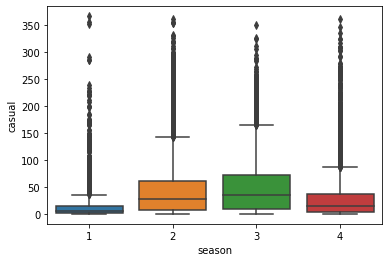

In [23]:
sns.boxplot(data = bikes, x ="season", y="casual")

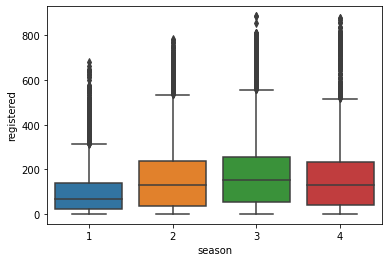

In [24]:
sns.boxplot(data = bikes, x ="season", y="registered")

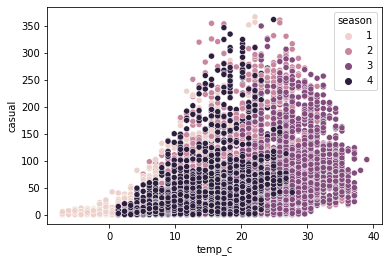

In [25]:
sns.scatterplot(data = bikes, x ="temp_c", y="casual", hue="season")

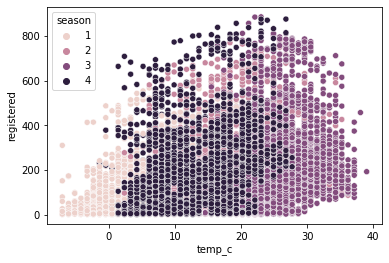

In [26]:
sns.scatterplot(data = bikes, x ="temp_c", y="registered",hue="season" )

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [28]:
bikes['total_bikes'] = bikes['casual'] + bikes['registered']
bikes['month'] = bikes['dteday'].apply(lambda x: x.split('/')[0])
bikes['day'] = bikes['dteday'].apply(lambda x: x.split('/')[1])
bikes['year'] = bikes['dteday'].apply(lambda x: x.split('/')[2])
bikes = bikes.astype({'month': 'int32', 'day': 'int32', 'year': 'int32'})

In [29]:
# split into input (X) and output (Y) variables
X = bikes[["hr", "workingday", "holiday"]]
y = bikes["total_bikes"]
 
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
normalizer = preprocessing.Normalization()

In [31]:
normalizer.adapt(np.array(X_train))

In [32]:
print(normalizer.mean.numpy())

[11.627705    0.67608184  0.03034856]


In [33]:
bikes_s = np.array(X_train)

bikes_normalizer = preprocessing.Normalization(input_shape=[1,])
bikes_normalizer.adapt(bikes_s)

In [34]:
bikes_model = tf.keras.Sequential([
    bikes_normalizer,
    layers.Dense(units=1)
])

bikes_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 3)                 7         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 11
Trainable params: 4
Non-trainable params: 7
_________________________________________________________________


In [38]:
bikes_model.predict(X_train[:10])

array([[ 2.2813764 ],
       [-5.5267305 ],
       [ 0.63219315],
       [ 2.611213  ],
       [-1.5076243 ],
       [-0.35731685],
       [ 2.7761314 ],
       [ 1.7866215 ],
       [-0.8520718 ],
       [ 0.30235648]], dtype=float32)

In [71]:
bikes_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1506124],
       [ 1.0785455],
       [-0.6328739]], dtype=float32)>

In [72]:
bikes_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [77]:

dll_model = bikes_model.fit(
    x=X_train,
    y=y_train,
    epochs=200
   )



Epoch 1/200
104/104 [==============================] - 0s 780us/step - loss: 182.0439
Epoch 2/200
104/104 [==============================] - 0s 803us/step - loss: 172.4392
Epoch 3/200
104/104 [==============================] - 0s 916us/step - loss: 163.5572
Epoch 4/200
104/104 [==============================] - 0s 752us/step - loss: 155.7749
Epoch 5/200
104/104 [==============================] - 0s 774us/step - loss: 149.0897
Epoch 6/200
104/104 [==============================] - 0s 829us/step - loss: 143.3497
Epoch 7/200
104/104 [==============================] - 0s 857us/step - loss: 138.5442
Epoch 8/200
104/104 [==============================] - 0s 760us/step - loss: 134.5709
Epoch 9/200
104/104 [==============================] - 0s 830us/step - loss: 131.2360
Epoch 10/200
104/104 [==============================] - 0s 957us/step - loss: 128.4297
Epoch 11/200
104/104 [==============================] - 0s 780us/step - loss: 126.0589
Epoch 12/200
104/104 [==============================

AttributeError: ignored

In [80]:
def build_and_compile_model():
 model = keras.Sequential([
 layers.Dense(64, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(1)
 ])
 
 model.compile(loss='mean_squared_error',
 optimizer=tf.keras.optimizers.Adam(0.001))
 return model

In [43]:
dnn_model = build_and_compile_model()
dnn_model.fit(
    x=X_train,
    y=y_train,
    epochs=200
)

Epoch 1/200
104/104 [==============================] - 1s 967us/step - loss: 52737.2773
Epoch 2/200
104/104 [==============================] - 0s 930us/step - loss: 28374.8652
Epoch 3/200
104/104 [==============================] - 0s 943us/step - loss: 27362.7852
Epoch 4/200
104/104 [==============================] - 0s 942us/step - loss: 27298.7891
Epoch 5/200
104/104 [==============================] - 0s 1ms/step - loss: 27186.3867
Epoch 6/200
104/104 [==============================] - 0s 861us/step - loss: 27154.0918
Epoch 7/200
104/104 [==============================] - 0s 840us/step - loss: 27126.4277
Epoch 8/200
104/104 [==============================] - 0s 946us/step - loss: 27027.1387
Epoch 9/200
104/104 [==============================] - 0s 1ms/step - loss: 26955.7578
Epoch 10/200
104/104 [==============================] - 0s 890us/step - loss: 26918.8789
Epoch 11/200
104/104 [==============================] - 0s 944us/step - loss: 26835.9375
Epoch 12/200
104/104 [============

In [44]:
#prediction
predictions = dnn_model.predict(X_test)
predictions

array([[270.32657],
       [136.19011],
       [244.58833],
       ...,
       [218.85007],
       [256.62326],
       [258.01297]], dtype=float32)

In [45]:
#mean squared error
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

127.34029744772458

In [46]:
# r2
from sklearn.metrics import r2_score

result = r2_score(y_test, predictions)
result

0.5154390063047365